In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [56]:
cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']
data=pd.read_csv('cleveland.data', names=cols)
#data=pd.read_csv('heart.csv')

In [57]:
#import seaborn as sns
#sns.pairplot(data,hue='target')

In [58]:
data.head()
#data.shape

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Attribute Information: ###

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. Target

In [59]:
 data = data.replace('?', np.nan)

In [60]:
data.dropna(inplace=True)

<AxesSubplot:xlabel='target', ylabel='count'>

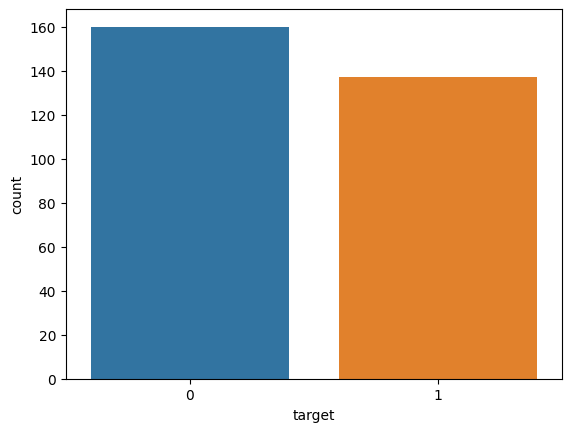

In [61]:
#data.shape
data['target'] = data['target'].replace([2,3,4],1)
sns.countplot(x='target',data=data)

In [62]:
output=data.target
data=data.drop('target',axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [63]:
#min_max normalization
df = data.astype(float)
norm_df=(df-df.min())/(df.max()-df.min())
norm_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00


In [64]:
#split into train and test data
x_train,x_test,y_train,y_test=train_test_split(data,output,test_size=0.2)#,random_state=42)

In [65]:
from sklearn import linear_model

regressor = linear_model.Lasso(alpha=0.1)
regressor.fit(x_train, y_train)

Lasso(alpha=0.1)

In [66]:
print(regressor.coef_)

[ 0.          0.          0.          0.00147051  0.00019009  0.
  0.         -0.00709577  0.          0.00924714  0.          0.04543401
  0.07035408]


In [67]:
# 1. K_nearest neighbours classifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

# Predicting the Test set results
y_pred1 = knn.predict(x_test)

# Making the Confusion Matrix
cm1 = confusion_matrix(y_test, y_pred1)
ac1 = accuracy_score(y_test, y_pred1)
cm1

array([[27, 10],
       [10, 13]], dtype=int64)

In [68]:
# 2. Random Forest classifier
rf = RandomForestClassifier(n_estimators = 1000) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rf.fit(x_train, y_train)
 
# performing predictions on the test dataset
y_pred2 = rf.predict(x_test)

cm2 = confusion_matrix(y_test, y_pred2)
ac2 = accuracy_score(y_test, y_pred2)
cm2

array([[32,  5],
       [ 8, 15]], dtype=int64)

In [69]:
# 3. Logistic Regression

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

## performing predictions on the test dataset
y_pred3 = lr.predict(x_test)

cm3 = confusion_matrix(y_test, y_pred3)
ac3 = accuracy_score(y_test, y_pred3)
cm3

C:\Users\anilc\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[33,  4],
       [ 7, 16]], dtype=int64)

In [70]:
# 4.Stochastic Gradient Descent Classifier

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)
sgd.fit(x_train, y_train)

## performing predictions on the test dataset
y_pred4 = sgd.predict(x_test)

cm4 = confusion_matrix(y_test, y_pred4)
ac4 = accuracy_score(y_test, y_pred4)
cm4

array([[24, 13],
       [ 6, 17]], dtype=int64)

In [71]:
#Ensemble Classifier
vote=[]
for i in range(len(y_pred4)):
    if(y_pred1[i]+y_pred2[i]+y_pred3[i]+y_pred4[i]<3):
        vote.append(0)
    else:
        vote.append(1)

cm5 = confusion_matrix(y_test, vote)
ac5 = accuracy_score(y_test, vote)
cm5

array([[33,  4],
       [ 8, 15]], dtype=int64)

In [72]:
print(ac1,ac2,ac3,ac4,ac5)


0.6666666666666666 0.7833333333333333 0.8166666666666667 0.6833333333333333 0.8
